SPRINT 2 TEAM ID:PNT2022TMID22022

Importing required Libraries

In [ ]:
import numpy#for numerical analysis
import tensorflow#open source ml tool by google

In [ ]:
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow import keras

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

Loading dataset

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


Analyze the data

In [ ]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[3]

1

In [ ]:
import matplotlib.pyplot as plt

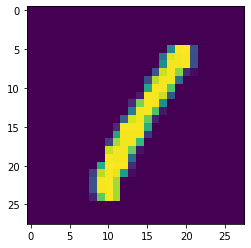

In [ ]:
plt.imshow(x_train[3])

Reshaping the data

In [ ]:
#(batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

Applying one hot encoding

In [ ]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Add CNN Layers

In [ ]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Train the model

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.2131 - accuracy: 0.9535 - val_loss: 0.0827 - val_accuracy: 0.9729
Epoch 2/5
1875/1875 [==============================] - 190s 102ms/step - loss: 0.0707 - accuracy: 0.9786 - val_loss: 0.0720 - val_accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0870 - val_accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.1015 - val_accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.1098 - val_accuracy: 0.9763


Observing the Metrics

In [ ]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

metrics-score=>test loss & accuracy
[0.10984234511852264, 0.9763000011444092]


Test the model

In [ ]:
prediction=model.predict(x_test[:5])
print(prediction)

1/1 [==============================] - 0s 97ms/step
[[4.8832619e-11 3.5156359e-16 3.4655363e-09 2.8150686e-07 4.1642825e-15
  8.0091321e-13 8.8336186e-17 9.9999976e-01 1.0097316e-09 2.2632807e-09]
 [3.0992588e-08 8.2181646e-07 9.9999678e-01 1.2604551e-07 6.2149363e-13
  1.2838051e-16 2.1193462e-06 4.2165308e-12 6.4395316e-08 2.3000451e-14]
 [1.5193679e-08 9.9996543e-01 5.8226806e-07 4.6779012e-09 5.6632221e-08
  2.6728968e-09 4.9063406e-11 1.6345449e-09 3.4016983e-05 4.7657422e-10]
 [1.0000000e+00 7.4965352e-18 7.4852888e-11 6.5066245e-17 1.5811159e-13
  1.5141665e-12 1.6924281e-09 4.7934157e-12 3.7687440e-12 5.1349741e-10]
 [3.2385852e-15 1.7851016e-15 8.8444910e-14 2.0162734e-17 1.0000000e+00
  7.2036086e-16 1.3920709e-13 9.9635266e-15 5.1955276e-12 1.0597931e-10]]


In [ ]:
import numpy as np

In [ ]:
print(np.argmax(prediction,axis=1))

[7 2 1 0 4]


In [ ]:
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Save the Model

In [ ]:
model.save('models/mnistcnn.h5')

Test the saved model

y_train:(60000, 10)
y_test:(10000, 10)


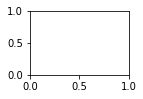

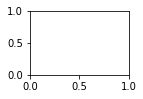

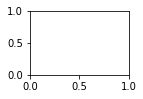

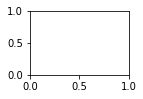

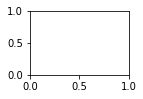

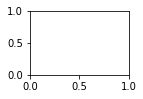

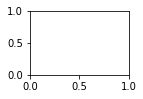

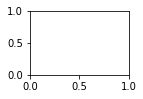

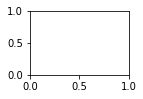

In [ ]:
from matplotlib import pyplot

print('y_train:' +str(y_train.shape))

print('y_test:' +str(y_test.shape))

for i in range(9):
  pyplot.subplot(330+1+i)
  
  pyplot.show()

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('models/mnistcnn.h5')
from PIL import Image
for index in range(9):
  img=X_train[index].reshape((28,28))
  imgarray=np.array(img)
  imgarray=imgarray.reshape(1,28,28,1)
  y_pred=model.predict(imgarray)
  print(np.argmax(y_pred))